In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

%matplotlib inline

# add matplotlib and seaborn package
# http://matplotlib.org/
from matplotlib import pyplot as plt

# https://stanford.edu/~mwaskom/software/seaborn/index.html
import seaborn as sns

# use pytraj
import pytraj as pt

# call matrix module
from pytraj import matrix

# load trajectory from file
traj = pt.iterload('RBD-Helix.NoWAT.mdcrd.nc', 'NoW.RBD-Helix.rec.wat.leap.prmtop')
traj

pytraj.TrajectoryIterator, 100000 frames: 
Size: 7.992983 (GB)
<Topology: 3576 atoms, 230 residues, 2 mols, PBC with box type = ortho>
           

In [2]:
dataHB = pt.search_hbonds(traj)

In [3]:
dataHB.donor_acceptor

['GLY7_O-NLN11_ND2-HD21',
 'SER17_OG-LEU120_N-H',
 'ASP66_OD1-ARG23_NE-HE',
 'ASP66_OD2-ARG23_NH2-HH21',
 'ALA65_O-LYS24_N-H',
 'ASN62_OD1-ARG25_NE-HE',
 'VAL63_O-ILE26_N-H',
 'ASN2_O-VAL30_N-H',
 'CYX193_O-ALA31_N-H',
 'ASP32_OD1-SER34_OG-HG',
 'SER34_O-ASN38_N-H',
 'SER34_O-ASN38_ND2-HD22',
 'TYR37_O-SER39_N-H',
 'GLY99_O-TYR48_N-H',
 'ASP57_OD1-ASN56_ND2-HD22',
 'VAL192_O-PHE60_N-H',
 'GLU184_OE2-ASN62_ND2-HD22',
 'SER182_O-TYR64_N-H',
 'LYS24_O-ALA65_N-H',
 'VAL180_O-ASP66_N-H',
 'ALA16_O-VAL69_N-H',
 'GLU74_OE1-ARG71_N-H',
 'ASP73_OD2-ARG71_NE-HE',
 'ASP73_OD2-ARG71_NH2-HH21',
 'GLU74_O-GLN77_N-H',
 'ASP207_OD2-LYS85_NZ-HZ3',
 'GLY84_O-ASP88_N-H',
 'ILE86_O-ASN90_N-H',
 'LYS85_O-ASN90_ND2-HD22',
 'ILE86_O-TYR91_N-H',
 'ASP66_OD2-TYR91_OH-HH',
 'TYR48_O-GLY99_N-H',
 'LEU181_O-CYX100_N-H',
 'GLN174_OE1-ASN105_ND2-HD21',
 'PRO175_O-SER106_N-H',
 'ASP110_OD2-SER106_OG-HG',
 'ASN105_OD1-ASN107_N-H',
 'SER106_O-LEU109_N-H',
 'ASN107_OD1-SER111_OG-HG',
 'ASP110_O-ASN116_ND2-HD22',
 'GLY1

In [6]:
f = open("InterMolHB-Pairs.txt","r")
HBpairs = [m.replace('_','').replace('@','_').strip() for m in f. readlines()[1:]]
HBpairs

['GLU214_OE1-ARG71_NE-HE',
 'GLU214_OE1-ARG71_NH1-HH12',
 'GLU214_OE2-ARG71_NH1-HH12',
 'GLU214_OE1-ARG71_NH2-HH21',
 'GLU214_OE2-ARG71_NH2-HH21',
 'GLU214_OE1-ARG71_NH2-HH22',
 'GLU214_OE2-ARG71_NH2-HH22',
 'ASP207_OD1-LYS85_NZ-HZ1',
 'ASP207_OD2-LYS85_NZ-HZ1',
 'ASP207_O-LYS85_NZ-HZ1',
 'HID211_NE2-LYS85_NZ-HZ1',
 'GLU214_OE1-LYS85_NZ-HZ1',
 'ASP207_OD1-LYS85_NZ-HZ2',
 'ASP207_OD2-LYS85_NZ-HZ2',
 'HID211_NE2-LYS85_NZ-HZ2',
 'ASP207_OD1-LYS85_NZ-HZ3',
 'ASP207_OD2-LYS85_NZ-HZ3',
 'ASP207_O-LYS85_NZ-HZ3',
 'ASN210_OD1-LYS85_NZ-HZ3',
 'HID211_NE2-LYS85_NZ-HZ3',
 'GLU200_OE1-TYR89_OH-HH',
 'GLU200_OE2-TYR89_OH-HH',
 'TRP225_NE1-LYS112_NZ-HZ3',
 'TYR218_OH-GLY114_N-H',
 'SER221_OG-GLY114_N-H',
 'TYR218_OH-GLY115_N-H',
 'TYR218_OH-ASN116_N-H',
 'ASP215_OD1-ASN116_ND2-HD21',
 'ASP215_OD2-ASN116_ND2-HD21',
 'TYR218_OH-ASN116_ND2-HD21',
 'TYR218_OH-ASN116_ND2-HD22',
 'TYR218_OH-TYR117_N-H',
 'ASP215_OD1-TYR117_OH-HH',
 'ASP215_OD2-TYR117_OH-HH',
 'TYR218_OH-TYR117_OH-HH',
 'GLN219_NE2-TYR117_

In [7]:
h_values = dataHB.data[HBpairs].values
h_values
print(sum(h_values))

[6 6 5 ... 7 6 8]


In [36]:
with open('Total-HBonds.txt','w') as f:
    for item in range(0,len(sum(h_values))):
        print(item,sum(h_values)[item], file = f)

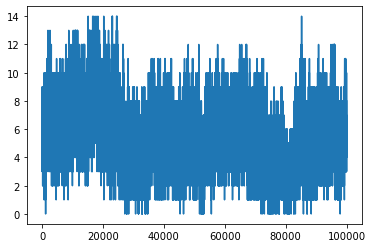

In [38]:
plt.plot(sum(h_values))